### Determine la probabilidad que cualquiera de los 20 alumnos de la materia tengan el mismo día de cumpleaños que el docente 

In [5]:
p = 1.0
i=21
p = p * (366 - i) / 365
print ('La probabilidad de que en un grupo de %3d personas, dos cumplan años el mismo día es de %10.6f' % (i, 1-p))

La probabilidad de que en un grupo de  21 personas, dos cumplan años el mismo día es de   0.054795


In [6]:
# Si quiero conocer todas las probabilidades según en el numero de personas tomando de cero a 100

p = 1.0
for i in range(1, 100):
    p = p * (366 - i) / 365
    print ('La probabilidad de que en un grupo de %3d personas, dos cumplan años el mismo día es de %10.6f' % (i, 1-p))





In [8]:
j=21
pf = (364/365)**j
print ('La probabilidad de que en un grupo de %3d alumnos, alguno cumplan años el mismo día que el docente es %10.6f' % (j, 1-pf))


La probabilidad de que en un grupo de  21 alumnos, alguno cumplan años el mismo día que el docente es   0.055985


In [ ]:
# Si quiero conocer todas las probabilidades según en el numero de personas tomando de cero a 100
for j in range(1, 100):
    pf = (364/365)**j
    print ('La probabilidad de que en un grupo de %3d alumnos, alguno cumplan años el mismo día que el docente es %10.6f' % (j, 1-pf))


### Distintos pasos para generar, normalizar y trabajar con histogramas

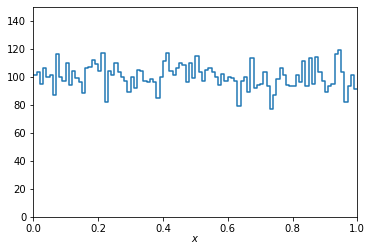

<Figure size 432x288 with 0 Axes>

In [10]:
# Simple Monte Carlo program to make histogram of uniformly distributed random values and plot
# G. Cowan, RHUL Physics

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Generate data and store in numpy array, put into histogram

numVal = 10000
nBins = 100
xMin = 0.
xMax = 1.
xData = np.random.uniform(xMin, xMax, numVal)
xHist, bin_edges = np.histogram(xData, bins=nBins, range=(xMin, xMax))

# Make plot and save in file

binLo, binHi = bin_edges[:-1], bin_edges[1:]
xPlot = np.array([binLo, binHi]).T.flatten()
yPlot = np.array([xHist, xHist]).T.flatten()
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
ax.set_xlim((xMin, xMax))
ax.set_ylim((0., 150))
plt.xlabel(r'$x$', labelpad=0)
plt.plot(xPlot, yPlot)
plt.show()
plt.savefig("uniformHist.png", format='png')


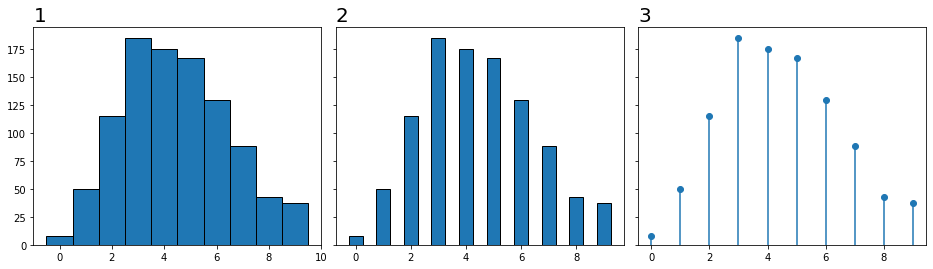

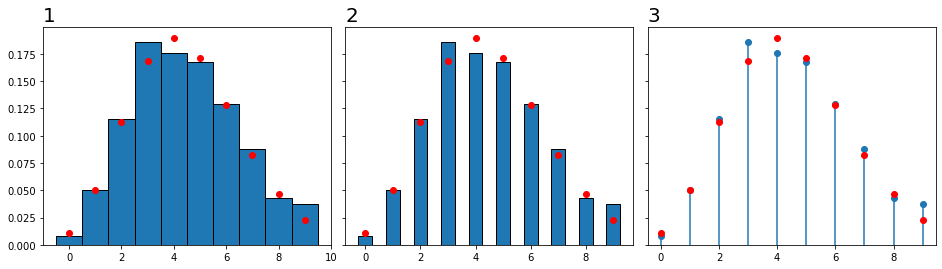

In [9]:
#http://users.df.uba.ar/maurosilber/incertezas/histogramas.html
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt
#matplotlib inline

np.random.seed(42) # Para obtener la misma secuencia de numeros aleatorios
X = poisson(mu=4.5) # Defino una variable aleatoria con distribucion de Poisson de parametro 4.5
Xi = X.rvs(size=1000) # Genero 1000 numeros de la variable aleatoria

Y, bins = np.histogram(Xi, bins=np.arange(0, Xi.max())) # Genero el histograma

f, ax = plt.subplots(ncols=3, figsize=(16,4), sharey=True)
f.subplots_adjust(wspace=0.05)

ax[0].bar(bins[:-1], Y, width=1, ec='k') # Grafico el histograma (grafico de barras)
ax[1].bar(bins[:-1], Y, width=0.5, ec='k')
ax[2].stem(bins[:-1], Y, basefmt=' ', use_line_collection=True) # Stem-plot

for k, a in enumerate(ax, 1):
    a.set_title(k, loc='left', fontsize=20)

plt.show()

#Normalizacion
Y_normed = Y / np.sum(Y)

f, ax = plt.subplots(ncols=3, figsize=(16,4), sharey=True)
f.subplots_adjust(wspace=0.05)

ax[0].bar(bins[:-1], Y_normed, width=1, ec='k')
ax[1].bar(bins[:-1], Y_normed, width=0.5, ec='k')
ax[2].stem(bins[:-1], Y_normed, basefmt=' ', use_line_collection=True)


for k, a in enumerate(ax, 1):
    a.scatter(bins[:-1], X.pmf(bins[:-1]), color='red', zorder=3)
    a.set_title(k, loc='left', fontsize=20)

plt.show()

### Juege a tirar un dado

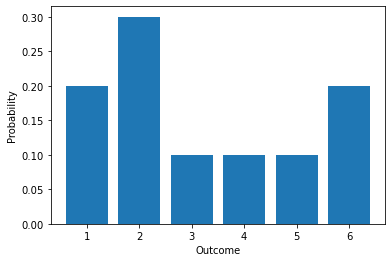

In [16]:
#I created an array filled with 0 with the Numpy function zeros().
#(from https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/)
#At each throw, I chose a value among the 6 possibilities.
#Then, I used the Numpy function unique() with the parameter return_counts set to True to get the number of each possible outcome.
#I plotted the proportion for each possible value.

import numpy as np
import matplotlib.pyplot as plt

num_throws = 10
outcomes = np.zeros(num_throws)
for i in range(num_throws):
   # let's roll the dice
   outcome = np.random.choice(['1', '2', '3', '4', '5', '6'])
   outcomes[i] = outcome

val, cnt = np.unique(outcomes, return_counts=True)
prop = cnt / len(outcomes)

# Now that we have rolled our dice several times, let's plot the results
plt.bar(val, prop)
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()
plt.close()
